# 7.2 Random Walks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interactive

## Random walk along a straight line

Define variables

In [2]:
N = 20 # number of steps
x0 = 0 # initial position
a = 1 # step size
p = 0.5 # probability of step to the right
q = 0.5 # probability of step to the left

In [3]:
x = x0
for n in range(N):       
    if p < np.random.rand():
        x += a
    else:
        x -= a
print(x)

6


In [4]:
def walker(N = 100, # number of steps
           x0 = 0, # initial position
           a = 1, # step size
           p = 0.5, # probability of step to the right
          ):
    
    xAccum = np.zeros(N)
    xSquaredAccum = np.zeros(N)
    
    x = x0
    for n in range(N):
        xAccum[n] += x
        xSquaredAccum[n] += x*x
        
        if p < np.random.rand():
            x += a
        else:
            x -= a
        
    return {'xAccum': xAccum,
            'xSquaredAccum': xSquaredAccum,
            }

In [5]:
rows = []
trials = 10
for t in range(trials):
    row = walker(N=20)
    rows.append(row)

df = pd.DataFrame(rows)

In [186]:
df

,xAccum,xSquaredAccum
0,"[0.0, -1.0, -2.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2....","[0.0, 1.0, 4.0, 1.0, 0.0, 1.0, 0.0, 1.0, 4.0, ..."
1,"[0.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 2.0, ...","[0.0, 1.0, 4.0, 9.0, 16.0, 9.0, 4.0, 1.0, 4.0,..."
2,"[0.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, ...","[0.0, 1.0, 4.0, 1.0, 4.0, 9.0, 4.0, 1.0, 4.0, ..."
3,"[0.0, 1.0, 2.0, 1.0, 0.0, -1.0, 0.0, -1.0, -2....","[0.0, 1.0, 4.0, 1.0, 0.0, 1.0, 0.0, 1.0, 4.0, ..."
4,"[0.0, -1.0, -2.0, -3.0, -4.0, -3.0, -2.0, -3.0...","[0.0, 1.0, 4.0, 9.0, 16.0, 9.0, 4.0, 9.0, 4.0,..."
5,"[0.0, -1.0, 0.0, -1.0, -2.0, -1.0, -2.0, -3.0,...","[0.0, 1.0, 0.0, 1.0, 4.0, 1.0, 4.0, 9.0, 4.0, ..."
6,"[0.0, -1.0, 0.0, -1.0, -2.0, -3.0, -2.0, -1.0,...","[0.0, 1.0, 0.0, 1.0, 4.0, 9.0, 4.0, 1.0, 4.0, ..."
7,"[0.0, 1.0, 0.0, -1.0, 0.0, 1.0, 2.0, 3.0, 2.0,...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 4.0, 9.0, 4.0, ..."
8,"[0.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, ...","[0.0, 1.0, 0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 16...."
9,"[0.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 1.0, 0.0...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."


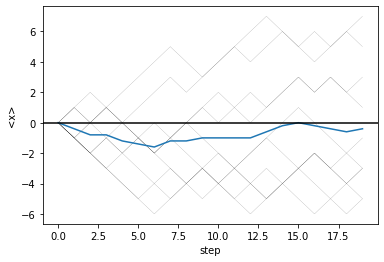

In [6]:
def plot_x(df):
    trials = len(df)
    for t in range(trials):
        walk = df.iloc[t]
        plt.plot(walk.xAccum, 'k-', linewidth=0.1)

    plt.plot(df.xAccum.mean()) 
    plt.axhline(0, color='k')
    plt.xlabel('step')
    plt.ylabel('<x>')

plot_x(df)

Text(0, 0.5, 'x')

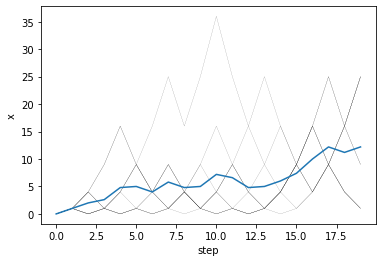

In [188]:
for t in range(trials):
    walk = df.iloc[t]
    plt.plot(walk.xSquaredAccum, 'k-', linewidth=0.1)

plt.plot(df.xSquaredAccum.mean())
plt.xlabel('step')
plt.ylabel('x')

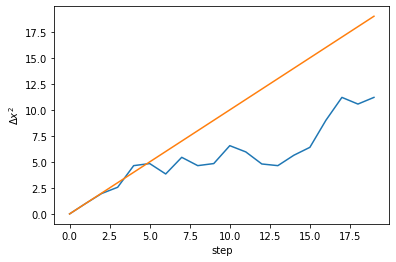

In [192]:
def plot_Δx2(df):
    
    plt.plot(df.xSquaredAccum.mean() - df.xAccum.mean()**2)
    plt.xlabel('step')
    plt.ylabel('$\Delta x^2$')

    q = 1 - p
    Δx2_theory = 4 * p * q * np.arange(N) * a**2
    plt.plot(Δx2_theory)
    
plot_Δx2(df)

In [190]:
def run_trials(trials=10, N=20, p=0.5):

    rows = []
    for t in range(trials):
        row = walker(N=N, p=p)
        rows.append(row)

    df = pd.DataFrame(rows)
    df.trials = trials
    df.N = N
    df.p = p
    
    return df

In [193]:
def simulate(trials = 10,
             N = 20):
    print('Started...')
    p = 0.5
    df = run_trials(trials=trials, N=N, p=p)

    fig, axs = plt.subplots(1,2, figsize=(12, 3))
    plt.sca(axs[0])
    plot_x(df)
    plt.sca(axs[1])
    plot_Δx2(df)

    plt.figtext(0.5, 1, f'N={N} trials={trials}')
    print('done.')
    
interactive(simulate, N = (10, 500, 10), trials=(10, 1000, 10))

interactive(children=(IntSlider(value=10, description='trials', max=1000, min=10, step=10), IntSlider(value=20…

In [ ]:
df.xAccum

In [ ]:
df = run_trials(N=31, trials=400)
plt.hist(np.hstack(df.xAccum), 40);

In [ ]:
df = run_trials(N=40, trials=100000)
final_x = [x[-1] for x in df.xAccum]
plt.hist(final_x, np.arange(-20,20,2));

In [ ]:
plt.hist(np.hstack(df.xAccum), np.arange(-20,20,2));

## Problem 7.8 A random walk in two dimensions

In [ ]:
def walker2D(N = 100, # number of steps
           x0 = 0, # initial position
           y0 = 0, 
           a = 1, # step size
           p = 0.5, # probability of step to the right/up
          ):
    
    xAccum = np.zeros(N)
    xSquaredAccum = np.zeros(N)
    yAccum = np.zeros(N)
    ySquaredAccum = np.zeros(N)
    
    x = x0
    y = y0
    for n in range(N):
        xAccum[n] += x
        xSquaredAccum[n] += x*x
        
        yAccum[n] += y
        ySquaredAccum[n] += y*y
        
        r = np.random.rand()
        if r < 0.25:
            x += a
        elif r < 0.50:
            x -= a
        elif r < 0.75:
            y += a
        else:
            y -= a
        
    return {'xAccum': xAccum,
            'xSquaredAccum': xSquaredAccum,
            'yAccum': yAccum,
            'ySquaredAccum': ySquaredAccum,
            }

In [173]:
def run_trials(trials=10, N=20, p=0.5):

    rows = []
    for t in range(trials):
        row = walker2D(N=N, p=p)
        rows.append(row)

    df = pd.DataFrame(rows)
    df.trials = trials
    df.N = N
    df.p = p
    
    return df

In [174]:
df = run_trials(trials=1000, N=500)

In [175]:
df

,xAccum,xSquaredAccum,yAccum,ySquaredAccum
0,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, -1.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 1.0...","[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ..."
1,"[0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 4.0, ...","[0.0, 0.0, 0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 16...."
2,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.0, 1.0, 1....","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ..."
3,"[0.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, -1.0, -2.0, -1.0, -1.0, -1.0, ...","[0.0, 0.0, 0.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, ..."
4,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
...,...,...,...,...
995,"[0.0, 0.0, -1.0, -1.0, -2.0, -2.0, -3.0, -3.0,...","[0.0, 0.0, 1.0, 1.0, 4.0, 4.0, 9.0, 9.0, 9.0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, -1.0, -1.0, 0.0, -1....","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
996,"[0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 4.0, 1.0, ..."
997,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, ...","[0.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, ..."
998,"[0.0, -1.0, 0.0, -1.0, -1.0, 0.0, 1.0, 2.0, 2....","[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 4.0, ..."


(-56.05, 55.05, -51.65, 50.65)

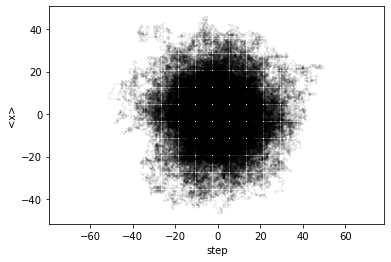

In [176]:
def plot_xy(df):
    trials = len(df)
    for t in range(trials):
        walk = df.iloc[t]
        plt.plot(walk.xAccum, walk.yAccum,'k-', linewidth=0.1)

    plt.xlabel('step')
    plt.ylabel('<x>')

plot_xy(df)
plt.axis('equal')

In [177]:
def simulate(trials = 10,
             N = 20):
    print('Started...')
    p = 0.5
    df = run_trials(trials=trials, N=N, p=p)

    fig, axs = plt.subplots(1,1, figsize=(8, 8))
    plot_xy(df)
    plt.axis('equal')

    plt.figtext(0.5, 1, f'N={N} trials={trials}')
    print('done.')
    
interactive(simulate, N = (10, 500, 10), trials=(10, 1000, 10))

interactive(children=(IntSlider(value=10, description='trials', max=1000, min=10, step=10), IntSlider(value=20…

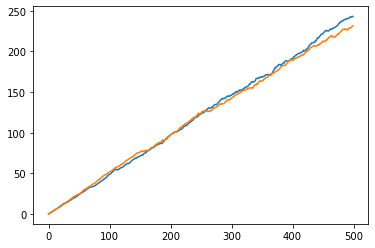

In [179]:
plt.plot(df.ySquaredAccum.mean() - df.yAccum.mean()**2)
plt.plot(df.xSquaredAccum.mean() - df.xAccum.mean()**2)